In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
#读取tsv文件加sep="\t"
Sig_Eqs = pd.read_csv("earthquakes-2023-11-01_21-34-45_+0800.tsv",sep="\t")

In [21]:
#Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country,
#and then print the top ten countries along with the total number of deaths.
total_number_of_deaths = Sig_Eqs['Deaths'].sum()
the_top_ten_countries = Sig_Eqs.sort_values(by='Deaths',ascending=False).head(10)
the_top_ten_countries

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
687,NaN,732.0,1556.0,1.0,23.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
5676,NaN,8732.0,2010.0,1.0,12.0,21.0,53.0,10.0,4622.0,NaN,...,NaN,NaN,300000.0,4.0,8000.0,4.0,97294.0,4.0,188383.0,4.0
77,NaN,64.0,115.0,12.0,13.0,NaN,NaN,NaN,4396.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
152,NaN,131.0,525.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
4316,NaN,4735.0,1976.0,7.0,27.0,19.0,42.0,54.6,NaN,NaN,...,NaN,NaN,799000.0,4.0,5600.0,4.0,NaN,NaN,NaN,NaN
360,NaN,402.0,1139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
2954,NaN,3165.0,1920.0,12.0,16.0,12.0,5.0,54.7,3541.0,NaN,...,NaN,NaN,NaN,NaN,25.0,4.0,NaN,NaN,NaN,NaN
238,NaN,232.0,856.0,12.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
259,NaN,268.0,893.0,12.0,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
3014,NaN,3227.0,1923.0,9.0,1.0,2.0,58.0,37.0,1526.0,NaN,...,43476.0,4.0,47000.0,4.0,600.0,4.0,695000.0,4.0,NaN,NaN


<Axes: xlabel='Year', ylabel='total_mag>6'>

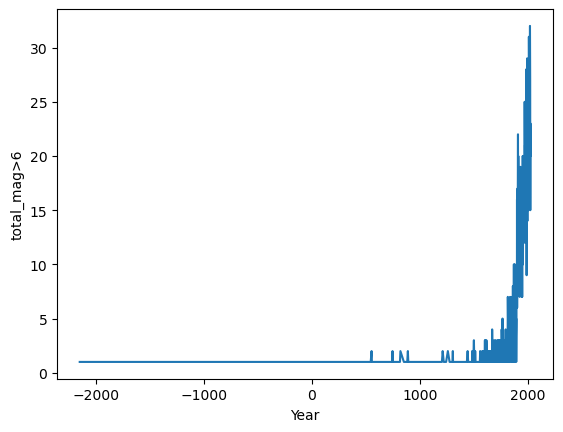

In [22]:
#1.2
#Compute the total number of earthquakes with magnitude larger than 6.0
#(use column Mag as the magnitude) worldwide each year, and then plot the time series. 
group_mag = Sig_Eqs[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()
plt.ylabel('total_mag>6')
group_mag['Mag'].plot()

In [23]:
#1.3
def CountEq_LargestEq(country):
    total = Sig_Eqs[Sig_Eqs['Country']==country]
    num = total[total['Mag']>0].count()['Year']
    temp_total = total.sort_values(by='Mag',ascending = False).head()
    de_total = temp_total.sort_values(by='Year',ascending = False).head()
    de_total = de_total.reset_index(drop = True)
    date = de_total.loc[0,['Year','Mo','Dy','Hr']]
    return(num),(date)
res = pd.DataFrame(columns=['Country','total_mag','date'])
country=[]
for (Country),group in Sig_Eqs[Sig_Eqs['Mag']>0].groupby('Country'):
    country.append(Country)
x=0
for i in country:
    res.loc[str(x)] = [i,CountEq_LargestEq(i)[0],CountEq_LargestEq(i)[1]]
    x+=1
res = res.sort_values(by='total_mag',ascending=False)
res = res.reset_index(drop = True)
res

,Country,total_mag,date
0,CHINA,589,Year 1920.0 Mo 12.0 Dy 16.0 H...
1,JAPAN,351,Year 2011.0 Mo 3.0 Dy 11.0 H...
2,INDONESIA,331,Year 2012.0 Mo 4.0 Dy 11.0 H...
3,IRAN,259,Year 2013.0 Mo 4.0 Dy 16.0 H...
4,USA,223,Year 1965.0 Mo 2.0 Dy 4.0 H...
...,...,...,...
141,NORWAY,1,Year 1819.0 Mo 8.0 Dy 31.0 H...
142,SUDAN,1,Year 1993.0 Mo 8.0 Dy 1.0 H...
143,PALAU,1,Year 1914.0 Mo 10.0 Dy 23.0 H...
144,SIERRA LEONE,1,Year 1795.0 Mo 5.0 Dy 20.0 H...


Text(0.5, 1.0, ' Monthly averaged wind speed')

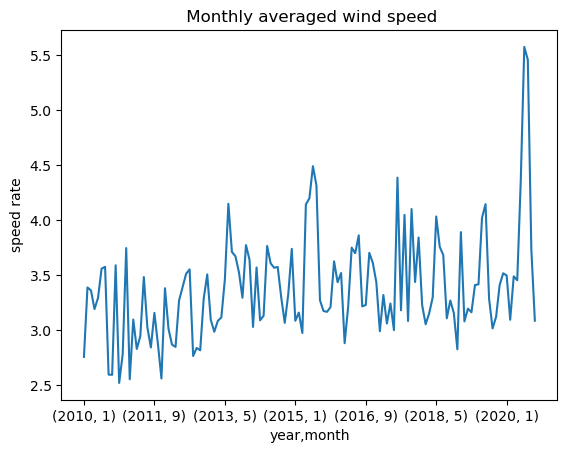

In [24]:
# PS2_2
## 2
Data = pd.read_csv("2281305.csv",low_memory=False)
temp = Data.loc[:,['DATE','WND']]
wind = temp['WND'].str.split(',',expand=True)
# temp = pd.DataFrame(temp,columns = ['direction angle','direction quality code','type code','speed rate','speed quality code']
wind
temp['WND'] = wind[3].astype(int)/10
temp['WND'].replace(999.9,np.nan,inplace=True)
temp['year'] = pd.DatetimeIndex(temp.DATE).year
temp['month'] = pd.DatetimeIndex(temp.DATE).month
temp.columns = ['date','speed rate','year','month']
temp.groupby(['year','month'])['speed rate'].mean().plot()
plt.ylabel('speed rate')
plt.title(' Monthly averaged wind speed')

In [7]:
#3
## 3.1
date = pd.read_csv("data.csv")
#删除列
del date["PRCP(Inches)"]
del date["SNOW(Inches)"]

Text(0.5, 0, 'year')

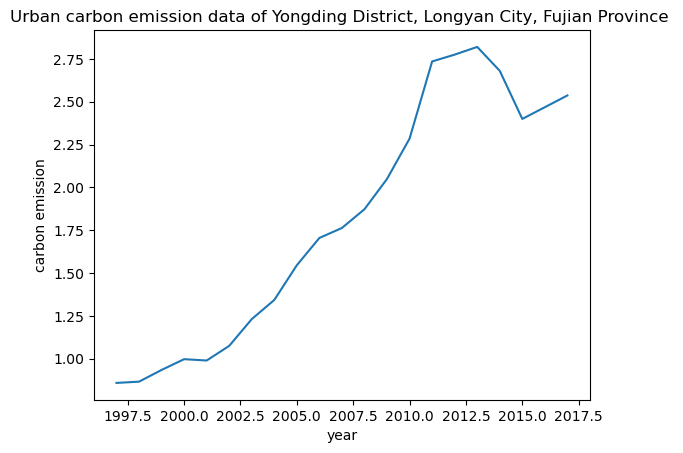

In [8]:
## 3.2  
x = date["Time"]
y = date["carbon emission"]
# Plot a line
plt.plot(x, y)
plt.title('Urban carbon emission data of Yongding District, Longyan City, Fujian Province ')
plt.ylabel('carbon emission')
plt.xlabel('year')

In [19]:
##3.3

In [15]:
date["carbon emission"].max()

2.820306706

In [16]:
date["carbon emission"].max()

2.820306706

In [17]:
date["carbon emission"].mean()

1.8061113682380951

In [18]:
#中间值
date["carbon emission"].median()

1.763043386

In [19]:
date["carbon emission"].sum()

37.928338733